In [30]:
from AutoEncoderObjects import EntropyLimitedAutoencoder
import pickle
import torch

from LoadingDefault import LoadAudios
import matplotlib.pyplot as plt

In [31]:
with open("MODELOS/" + "metadatos_modelos.pkl", "rb") as f:
    lista_cargada = pickle.load(f)

for i in lista_cargada:
    print(i)

{'loss_type': 'MSE', 'data': 'songs', 'epochs': 5, 'loss_epochs': [0.04885690659284592, 0.027258912722269695, 0.017571585873762768, 0.014349226529399553, 0.012027242220938206], 'loss_batch': [0.033646754920482635, 0.06950154900550842, 0.04342241585254669, 0.028649406507611275, 0.02502906322479248, 0.028098268434405327, 0.018578272312879562, 0.018169298768043518, 0.01596718654036522, 0.015054875984787941, 0.014584507793188095, 0.013408295810222626, 0.011270800605416298, 0.012422858737409115, 0.012388067319989204], 'file_weights': 'MSE-songs.pth', 'file_full': 'MSE-songs-completo.pth'}
{'loss_type': 'NLPD', 'data': 'songs', 'epochs': 5, 'loss_epochs': [479.0591176350911, 368.9906260172526, 318.824956258138, 294.05697377522785, 275.8067092895508], 'loss_batch': [551.4072875976562, 712.8967895507812, 172.87327575683594, 522.0072631835938, 455.37249755859375, 129.5921173095703, 419.5391540527344, 417.60699462890625, 119.32872009277344, 384.0426330566406, 372.024169921875, 126.10411834716797

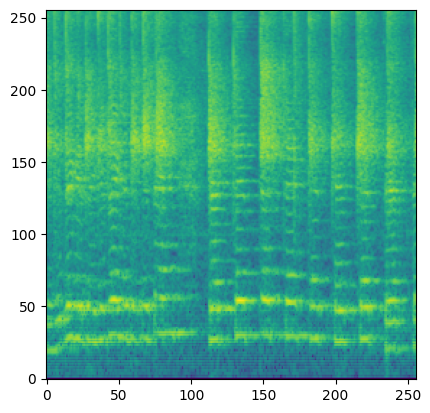

In [48]:
XX, m= LoadAudios(limit = 5)
plt.imshow(XX[4],origin='lower')
plt.show()

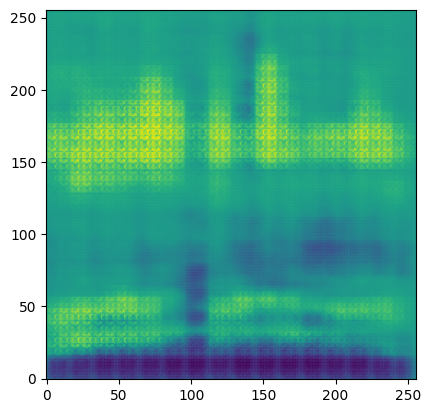

In [50]:
mse_songs = EntropyLimitedAutoencoder()
mse_songs.load_state_dict(torch.load("MODELOS/MSE-songs.pth"))

mse_songs_rec = mse_songs.decode(mse_songs.encode(torch.stack([XX[4]]).unsqueeze(1)))

plt.imshow(mse_songs_rec[0][0].detach().numpy(),origin='lower')
plt.show()

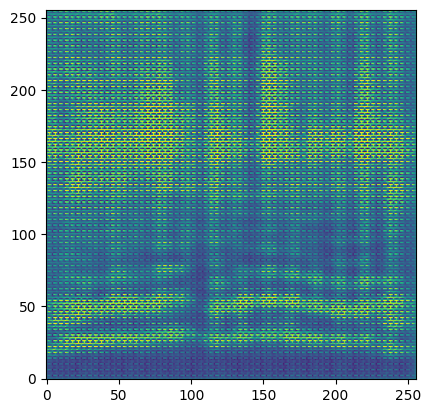

In [51]:
nlpd_songs = EntropyLimitedAutoencoder()
nlpd_songs.load_state_dict(torch.load("MODELOS/NLPD-songs.pth"))

nlpd_songs_rec = nlpd_songs.decode(nlpd_songs.encode(torch.stack([XX[4]]).unsqueeze(1)))

plt.imshow(nlpd_songs_rec[0][0].detach().numpy(),origin='lower')
plt.show()

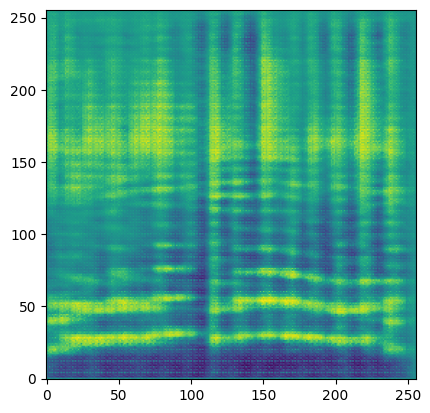

In [52]:
msssim_songs = EntropyLimitedAutoencoder()
msssim_songs.load_state_dict(torch.load("MODELOS/MSSSIM-songs.pth"))

msssim_songs_rec = msssim_songs.decode(msssim_songs.encode(torch.stack([XX[4]]).unsqueeze(1)))

plt.imshow(msssim_songs_rec[0][0].detach().numpy(),origin='lower')
plt.show()

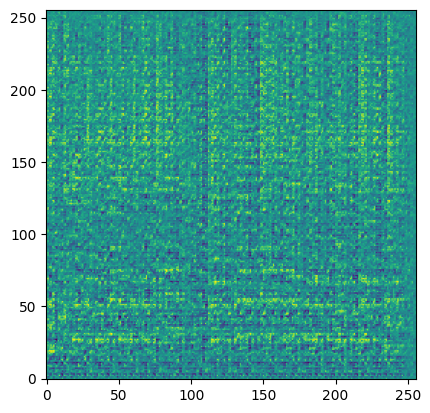

In [53]:
msssim_noise = EntropyLimitedAutoencoder()
msssim_noise.load_state_dict(torch.load("MODELOS/MSSSIM-noise.pth"))

msssim_noise_rec = msssim_noise.decode(msssim_noise.encode(torch.stack([XX[4]]).unsqueeze(1)))

plt.imshow(msssim_noise_rec[0][0].detach().numpy(),origin='lower')
plt.show()

In [59]:
from preprocessing import Reconstruction
from IPython.display import Audio
reconstruction = Reconstruction(msssim_noise_rec[0][0], maxi=m[4]["maximum"], mini=m[4]["minimum"])
Audio(reconstruction.detach().numpy(), rate=16000)

c:\Users\jpeir\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchaudio\functional\functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (256) may be set too high. Or, the value for `n_freqs` (513) may be set too low.
  warnings.warn(


In [56]:
original = Reconstruction(XX[4], maxi=m[4]["maximum"], mini=m[4]["minimum"])
Audio(original.numpy(), rate=16000)